In [ ]:
'''
 * Copyright (c) 2010 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Exercise 5: Estimating a probability via Monte Carlo

We aim to estimate the probability $ p = P \left( \frac{x}{x+1} > 0.3 e^{-x} \right) $, where $ x \sim \text{Gamma}(3, 2) $, using Monte Carlo simulation.

## Monte Carlo Estimation

Let $ J = 20,000 $. We sample $ x_1, x_2, \dots, x_J \sim \text{iid Gamma}(3, 2) $ and define the following indicator function:

$$
r_j = I \left( \frac{x_j}{x_j+1} > 0.3 e^{-x_j} \right)
$$

Then, we can estimate $ p $ as:

$$
\hat{p} = \frac{1}{J} \sum_{j=1}^{J} r_j = 0.2117
$$

### Confidence Interval

A 95% confidence interval for $ p $ can be calculated as:

$$
\hat{p} \pm 1.96 \sqrt{\frac{\hat{p}(1 - \hat{p})}{20000}} = (0.2060, 0.2173)
$$

## Alternative Interpretation

Alternatively, we can view the probability as:

$$
p = P(y > 0.3), \text{ where } y = \frac{e^{-x}}{x+1}
$$

Sampling $ x_1, x_2, \dots, x_J \sim \text{Gamma}(3, 2) $, we compute:

$$
y_j = \frac{e^{-x_j}}{x_j+1}
$$

We then define:

$$
r_j = I(y_j > 0.3)
$$

This leads to the same estimate of $ p $.

## Estimate of the Density Function

As a by-product of this second approach, we can estimate the density function $ f(y) $ of the random variable $ y = \frac{e^{-x}}{x+1} $. This density would be difficult to obtain analytically.

**Note:** The `density()` function in R, used to smooth histograms, does not adequately capture the upper region of the density $ f(y) $, nor the fact that $ f(y) = 0 $ when $y < 0 $.

Below is the illustration from Figure.7.



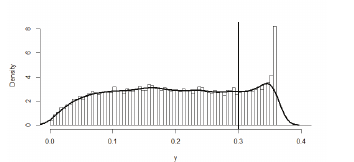

Figure.7 Histogram of 20,000 values of y

Estimated p: 0.99965
95% Confidence Interval: (0.9993907617501216, 0.9999092382498784)


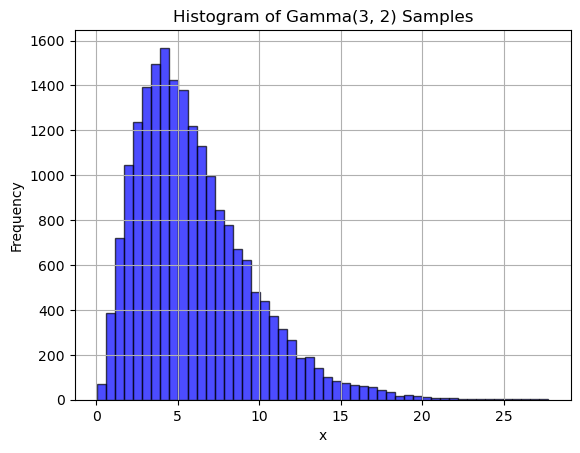

In [1]:
import random
import math
import matplotlib.pyplot as plt

# Set parameters
J = 20000  # Number of samples
alpha = 3  # Gamma shape parameter
beta = 2   # Gamma scale parameter

# Generate random variables from the Gamma(3, 2) distribution
gamma_samples = [random.gammavariate(alpha, beta) for _ in range(J)]

# Calculate the function r_j = I((x / (x+1)) > 0.3 * exp(-x))
r_j = [(x / (x + 1)) > 0.3 * math.exp(-x) for x in gamma_samples]

# Estimate p
p_hat = sum(r_j) / J

# Calculate the 95% confidence interval
confidence_interval = 1.96 * math.sqrt((p_hat * (1 - p_hat)) / J)
lower_bound = p_hat - confidence_interval
upper_bound = p_hat + confidence_interval

# Print results
print(f"Estimated p: {p_hat}")
print(f"95% Confidence Interval: ({lower_bound}, {upper_bound})")

# Plot the histogram of gamma_samples
plt.hist(gamma_samples, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Gamma(3, 2) Samples')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Exercise.6: Buffon’s Needle Problem

A needle of length 10 cm is dropped randomly onto a floor with parallel lines that are 10 cm apart.

## Part (a): Analytical Derivation of $ p $

Let:
- $ X $ be the perpendicular distance from the center of the needle to the nearest line, measured in units of 5 cm.
- $ Y $ be the acute angle between the lines and the needle in radians.
- $ C $ be the event that the needle crosses a line.

We have:
- $ X \sim U(0, 1) $ with density $ f(x) = 1 $, for $ 0 < x < 1 $.
- $ Y \sim U \left( 0, \frac{\pi}{2} \right) $ with density $ f(y) = \frac{2}{\pi} $, for $ 0 < y < \frac{\pi}{2} $.
- $ X \perp Y $ (i.e., $ X $ and $ Y $ are independent), so:
  $$ f(x, y) = f(x) f(y) = 1 \times \frac{2}{\pi}, \quad 0 < x < 1, 0 < y < \frac{\pi}{2} $$

Now, the needle crosses a line if $ X < \sin Y $, so the probability $ p $ can be expressed as:

$$
p = P(C) = P(X < \sin Y)
$$

This gives:

$$
p = \int_0^{\frac{\pi}{2}} \int_0^{\sin y} f(x, y) \, dx \, dy
   = \frac{2}{\pi} \int_0^{\frac{\pi}{2}} \int_0^{\sin y} \, dx \, dy
$$

The inner integral $ \int_0^{\sin y} dx = \sin y $, so:

$$
p = \frac{2}{\pi} \int_0^{\frac{\pi}{2}} \sin y \, dy
$$

Now, integrating $ \sin y $ gives:

$$
p = \frac{2}{\pi} \left[ -\cos y \right]_0^{\frac{\pi}{2}} = \frac{2}{\pi} \left[ -\cos \frac{\pi}{2} - (-\cos 0) \right] = \frac{2}{\pi} \left( 0 - (-1) \right)
$$

Finally, we obtain:

$$
p = \frac{2}{\pi} \times 1 = \frac{2}{\pi} \approx 0.63662
$$

Thus, the probability that the needle crosses a line is approximately 0.63662.

## Part (b): Estimation of $ p $ Using Monte Carlo Simulation

We will estimate $ p $ using Monte Carlo methods with sample sizes of 1,000 and 10,000. A 95% confidence interval will also be provided for each case.


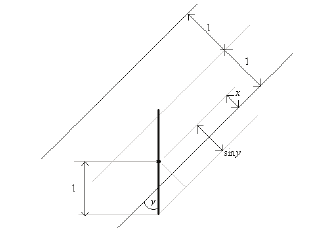

Figure.8 Illustration of Buffon’s needle problem

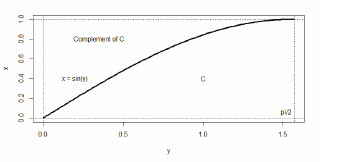

Figure.9 Illustration of the solution to Buffon’s needle problem

## Exercise.6: Buffon’s Needle Problem

A needle of length 10 cm is dropped randomly onto a floor with parallel lines that are 10 cm apart.

## Part (a): Analytical Derivation of $ p $

Let:
- $ X $ be the perpendicular distance from the center of the needle to the nearest line, measured in units of 5 cm.
- $Y $ be the acute angle between the lines and the needle in radians.
- $ C $ be the event that the needle crosses a line.

We have:
- $ X \sim U(0, 1) $ with density $ f(x) = 1 $, for $ 0 < x < 1 $.
- $ Y \sim U \left( 0, \frac{\pi}{2} \right) $ with density $ f(y) = \frac{2}{\pi} $, for $ 0 < y < \frac{\pi}{2} $.
- $ X \perp Y $ (i.e., $ X $ and $ Y $ are independent), so:
  $$ f(x, y) = f(x) f(y) = 1 \times \frac{2}{\pi}, \quad 0 < x < 1, 0 < y < \frac{\pi}{2} $$

Now, the needle crosses a line if $ X < \sin Y $, so the probability $ p $ can be expressed as:

$$
p = P(C) = P(X < \sin Y)
$$

This gives:

$$
p = \int_0^{\frac{\pi}{2}} \int_0^{\sin y} f(x, y) \, dx \, dy
   = \frac{2}{\pi} \int_0^{\frac{\pi}{2}} \int_0^{\sin y} \, dx \, dy
$$

The inner integral $ \int_0^{\sin y} dx = \sin y $, so:

$$
p = \frac{2}{\pi} \int_0^{\frac{\pi}{2}} \sin y \, dy
$$

Now, integrating $ \sin y $ gives:

$$
p = \frac{2}{\pi} \left[ -\cos y \right]_0^{\frac{\pi}{2}} = \frac{2}{\pi} \left[ -\cos \frac{\pi}{2} - (-\cos 0) \right] = \frac{2}{\pi} \left( 0 - (-1) \right)
$$

Finally, we obtain:

$$
p = \frac{2}{\pi} \times 1 = \frac{2}{\pi} \approx 0.63662
$$

Thus, the probability that the needle crosses a line is approximately 0.63662.

## Note 1: Alternate Derivation

Another way to express the above derivation is by considering:

$$
P(C | Y = y) = P(X < \sin y | y) = \sin y
$$

Since $ X \sim U(0, 1) $, we know:

$$
P(X < \sin y) = \sin y
$$

Thus, the probability $ p $ can be expressed as the expectation:

$$
p = E[\sin Y] = \int_0^{\frac{\pi}{2}} \sin y \cdot \frac{2}{\pi} \, dy = \frac{2}{\pi} \int_0^{\frac{\pi}{2}} \sin y \, dy
$$

This yields the same result:

$$
p = \frac{2}{\pi} = 0.63662
$$

## Note 2: General Case

If the length of the needle is $ r $ times the distance between the lines, the probability $ p $ that the needle will cross a line is given by:

$$
p = \begin{cases}
\frac{2r}{\pi}, & r \leq 1 \\
1 - \frac{2}{\pi} \left( r \cdot \sqrt{r^2 - 1} + \sin^{-1} \frac{1}{r} \right), & r > 1
\end{cases}
$$

## Part (b): Monte Carlo Estimation of $ p $

In this part, we estimate $ p $ using Monte Carlo methods by sampling $ X_1, X_2, \dots, X_J \sim U(0, 1) $ and $ Y_1, Y_2, \dots, Y_J \sim U(0, \frac{\pi}{2}) $, independently.

We define the indicator $ r_j = I(X_j < \sin Y_j) $, where:

$$
r_j = \begin{cases}
1, & \text{if } X_j < \sin Y_j \\
0, & \text{otherwise}
\end{cases}
$$

The Monte Carlo estimate of $ p $ is:

$$
\hat{p} = \frac{1}{J} \sum_{j=1}^{J} r_j
$$

We also compute a 95% confidence interval for $ p $ as:

$$
\hat{p} \pm z_{\alpha / 2} \sqrt{\frac{\hat{p}(1 - \hat{p})}{J}}
$$

### Monte Carlo Results

- For $ J = 1,000 $, we obtain:

  $$ \hat{p} = 0.618, \quad \text{95% CI} = (0.588, 0.648) $$

- For $ J = 10,000 $, we obtain:

  $$ \hat{p} = 0.633, \quad \text{95% CI} = (0.624, 0.643) $$

Increasing the sample size from 1,000 to 10,000 reduces the width of the confidence interval from 0.060 to 0.019. Both intervals contain the true value $ \frac{2}{\pi} \approx 0.6366 $.


Sample Size: 1,000
Estimated p: 0.6290
95% Confidence Interval: (0.5991, 0.6589)

Sample Size: 10,000
Estimated p: 0.6347
95% Confidence Interval: (0.6253, 0.6441)



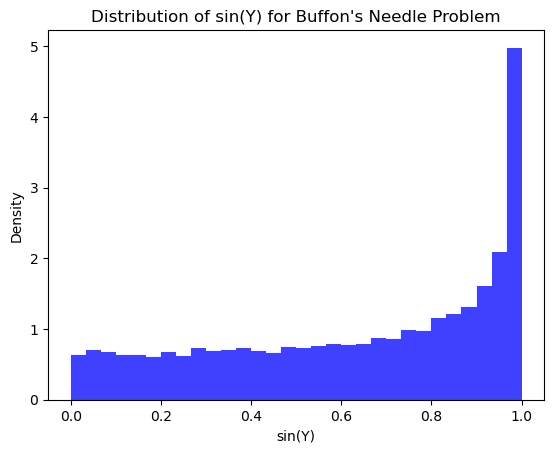

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate Buffon's needle problem
def buffon_needle(sample_size):
    # Generate random values for X ~ U(0, 1) and Y ~ U(0, pi/2)
    X = np.random.uniform(0, 1, sample_size)
    Y = np.random.uniform(0, np.pi/2, sample_size)
    
    # Count how many needles cross the line: X < sin(Y)
    crossings = np.sum(X < np.sin(Y))
    
    # Estimate probability p
    p_estimate = crossings / sample_size
    
    # Compute the 95% confidence interval
    z = 1.96  # 95% confidence level
    confidence_interval = z * np.sqrt(p_estimate * (1 - p_estimate) / sample_size)
    ci_lower = p_estimate - confidence_interval
    ci_upper = p_estimate + confidence_interval
    
    return p_estimate, (ci_lower, ci_upper)

# Simulate with sample size 1,000
p_1000, ci_1000 = buffon_needle(1000)
print(f"Sample Size: 1,000")
print(f"Estimated p: {p_1000:.4f}")
print(f"95% Confidence Interval: ({ci_1000[0]:.4f}, {ci_1000[1]:.4f})\n")

# Simulate with sample size 10,000
p_10000, ci_10000 = buffon_needle(10000)
print(f"Sample Size: 10,000")
print(f"Estimated p: {p_10000:.4f}")
print(f"95% Confidence Interval: ({ci_10000[0]:.4f}, {ci_10000[1]:.4f})\n")

# Plotting a histogram of sin(Y) to show its distribution
Y_samples = np.random.uniform(0, np.pi/2, 10000)
sin_Y = np.sin(Y_samples)

plt.hist(sin_Y, bins=30, density=True, alpha=0.75, color='b')
plt.title('Distribution of sin(Y) for Buffon\'s Needle Problem')
plt.xlabel('sin(Y)')
plt.ylabel('Density')
plt.show()


Sample Size: 1,000
Estimated p: 0.6340
95% Confidence Interval: (0.6041, 0.6639)

Sample Size: 10,000
Estimated p: 0.6472
95% Confidence Interval: (0.6378, 0.6566)



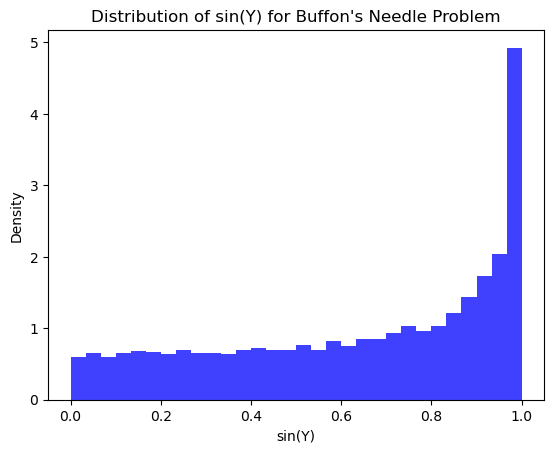

In [3]:
import random
import math
import matplotlib.pyplot as plt

# Function to simulate Buffon's needle problem
def buffon_needle(sample_size):
    crossings = 0
    
    # Simulate dropping the needle `sample_size` times
    for _ in range(sample_size):
        # Generate random X ~ U(0, 1) and Y ~ U(0, pi/2)
        X = random.uniform(0, 1)
        Y = random.uniform(0, math.pi / 2)
        
        # Check if needle crosses the line: X < sin(Y)
        if X < math.sin(Y):
            crossings += 1
    
    # Estimate probability p
    p_estimate = crossings / sample_size
    
    # Compute the 95% confidence interval
    z = 1.96  # 95% confidence level
    confidence_interval = z * math.sqrt(p_estimate * (1 - p_estimate) / sample_size)
    ci_lower = p_estimate - confidence_interval
    ci_upper = p_estimate + confidence_interval
    
    return p_estimate, (ci_lower, ci_upper)

# Simulate with sample size 1,000
p_1000, ci_1000 = buffon_needle(1000)
print(f"Sample Size: 1,000")
print(f"Estimated p: {p_1000:.4f}")
print(f"95% Confidence Interval: ({ci_1000[0]:.4f}, {ci_1000[1]:.4f})\n")

# Simulate with sample size 10,000
p_10000, ci_10000 = buffon_needle(10000)
print(f"Sample Size: 10,000")
print(f"Estimated p: {p_10000:.4f}")
print(f"95% Confidence Interval: ({ci_10000[0]:.4f}, {ci_10000[1]:.4f})\n")

# Plotting a histogram of sin(Y) to show its distribution
Y_samples = [random.uniform(0, math.pi / 2) for _ in range(10000)]
sin_Y = [math.sin(y) for y in Y_samples]

plt.hist(sin_Y, bins=30, density=True, alpha=0.75, color='b')
plt.title('Distribution of sin(Y) for Buffon\'s Needle Problem')
plt.xlabel('sin(Y)')
plt.ylabel('Density')
plt.show()


## Exercise.7 - Monte Carlo CIs for Gamma Mean

## (a) Estimating the mean $\mu = \frac{3}{2}$ using Monte Carlo method

We are using the gamma distribution $ \text{Gamma}(3, 2) $, which has the mean $\mu = \frac{3}{2} = 1.5$.

To estimate $\mu$, we generate a sample of size $ J = 100 $ from this distribution and compute a 95% confidence interval (CI) for $\mu$. The formula for the confidence interval is:

$$
CI = \left( \hat{\mu} \pm z_{\alpha/2} \frac{s}{\sqrt{J}} \right)
$$

Where:
- $\hat{\mu}$ is the sample mean,
- $s$ is the sample standard deviation,
- $z_{\alpha/2} = 1.96$ for a 95% confidence level.

For $ J = 100 $, we have the following estimate:

- Sample mean: $ \hat{\mu} = 1.517 $
- 95% CI: $ (1.354, 1.680) $
- Width of CI: $ 0.326 $

The interval contains the true mean $\mu = 1.5$.

## (b) Repeating for larger sample sizes

We repeat the estimation with different sample sizes $ J = 200, 500, 1000, 10000, 100000 $.

| Sample Size $J$ | Sample Mean $ \hat{\mu} $ | 95% CI | Width of CI | Contains $ \mu = 1.5 $? |
|:-----------------:|:-------------------------:|:------:|:-----------:|:---------------------------:|
| 200               | 1.471                     | (1.348, 1.593) | 0.245 | Yes |
| 500               | 1.430                     | (1.358, 1.502) | 0.144 | Yes |
| 1000              | 1.475                     | (1.419, 1.530) | 0.111 | Yes |
| 10000             | 1.490                     | (1.473, 1.508) | 0.034 | Yes |
| 100000            | 1.502                     | (1.497, 1.507) | 0.011 | Yes |

### Observations:
- As $J$ increases, the width of the confidence interval decreases.
- The sample mean appears to converge towards the true mean $\mu = 1.5$.

## (c) Repeating (a) $ M = 100 $ times

We repeat the process in (a) 100 times and count how many of the resulting 95% confidence intervals contain the true mean $\mu = 1.5$.

Out of 100 trials:
- $ \hat{p} = 93 \% $ of the CIs contain $\mu$.
- A 95% confidence interval for the true coverage probability $p$ is:

$$
CI_p = \left( \hat{p} \pm 1.96 \sqrt{\frac{\hat{p}(1-\hat{p})}{M}} \right)
     = (0.880, 0.980)
$$

## (d) Repeating (a) for larger $M$

We repeat the process for $ M = 200, 500, 1000, 10000 $.

| Trials $M$ | Proportion $ \hat{p} $ | 95% CI for $ p $ | CI Width |
|:------------:|:-----------------------:|:------------------:|:--------:|
| 200          | 0.945                   | (0.913, 0.977)     | 0.064    |
| 500          | 0.942                   | (0.922, 0.962)     | 0.040    |
| 1000         | 0.935                   | (0.914, 0.956)     | 0.042    |
| 10000        | 0.944                   | (0.940, 0.949)     | 0.009    |

### Observations:
- As $M$ increases, the confidence interval for the coverage probability $p$ becomes narrower.
- The observed proportion of CIs that contain $\mu = 1.5$ converges towards 95%, but due to Monte Carlo error, it is not exactly 95%.


In [4]:
import random
import math

# Function to calculate the 95% confidence interval for the mean
def calculate_ci(sample, alpha=0.05):
    J = len(sample)
    sample_mean = sum(sample) / J
    sample_var = sum((x - sample_mean) ** 2 for x in sample) / (J - 1)
    sample_std = math.sqrt(sample_var)
    
    # z_alpha/2 for a 95% confidence interval is 1.96
    z = 1.96
    margin_of_error = z * sample_std / math.sqrt(J)
    
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    return sample_mean, lower_bound, upper_bound, upper_bound - lower_bound

# Function to generate samples from the Gamma distribution
def gamma_sample(shape, scale, J):
    sample = []
    for _ in range(J):
        # Generate gamma random variables using the relation to exponential variables
        total = sum(-scale * math.log(random.random()) for _ in range(shape))
        sample.append(total)
    return sample

# Part (a): Estimation for J = 100
J = 100
shape = 3
scale = 2
sample = gamma_sample(shape, scale, J)
sample_mean, lower_bound, upper_bound, ci_width = calculate_ci(sample)
print(f"Sample mean: {sample_mean}")
print(f"95% CI: ({lower_bound}, {upper_bound})")
print(f"Width of CI: {ci_width}")
print(f"Does CI contain 1.5? {'Yes' if 1.5 >= lower_bound and 1.5 <= upper_bound else 'No'}")

# Part (b): Repeat for larger sample sizes
for J in [200, 500, 1000, 10000, 100000]:
    sample = gamma_sample(shape, scale, J)
    sample_mean, lower_bound, upper_bound, ci_width = calculate_ci(sample)
    print(f"\nSample size J = {J}")
    print(f"Sample mean: {sample_mean}")
    print(f"95% CI: ({lower_bound}, {upper_bound})")
    print(f"Width of CI: {ci_width}")
    print(f"Does CI contain 1.5? {'Yes' if 1.5 >= lower_bound and 1.5 <= upper_bound else 'No'}")

# Part (c): Repeating part (a) M = 100 times
M = 100
contained_count = 0
for _ in range(M):
    sample = gamma_sample(shape, scale, J=100)
    _, lower_bound, upper_bound, _ = calculate_ci(sample)
    if 1.5 >= lower_bound and 1.5 <= upper_bound:
        contained_count += 1

p_hat = contained_count / M
ci_for_p_lower = p_hat - 1.96 * math.sqrt((p_hat * (1 - p_hat)) / M)
ci_for_p_upper = p_hat + 1.96 * math.sqrt((p_hat * (1 - p_hat)) / M)
print(f"\nProportion of CIs containing 1.5: {p_hat}")
print(f"95% CI for p: ({ci_for_p_lower}, {ci_for_p_upper})")

# Part (d): Repeating (c) for M = 200, 500, 1000, and 10000
for M in [200, 500, 1000, 10000]:
    contained_count = 0
    for _ in range(M):
        sample = gamma_sample(shape, scale, J=100)
        _, lower_bound, upper_bound, _ = calculate_ci(sample)
        if 1.5 >= lower_bound and 1.5 <= upper_bound:
            contained_count += 1

    p_hat = contained_count / M
    ci_for_p_lower = p_hat - 1.96 * math.sqrt((p_hat * (1 - p_hat)) / M)
    ci_for_p_upper = p_hat + 1.96 * math.sqrt((p_hat * (1 - p_hat)) / M)
    print(f"\nFor M = {M}:")
    print(f"Proportion of CIs containing 1.5: {p_hat}")
    print(f"95% CI for p: ({ci_for_p_lower}, {ci_for_p_upper})")


Sample mean: 6.188931290340502
95% CI: (5.59045409951481, 6.787408481166194)
Width of CI: 1.1969543816513841
Does CI contain 1.5? No

Sample size J = 200
Sample mean: 6.013296136320541
95% CI: (5.5067744502372085, 6.519817822403874)
Width of CI: 1.0130433721666652
Does CI contain 1.5? No

Sample size J = 500
Sample mean: 6.2816253850102965
95% CI: (5.97162989218804, 6.591620877832553)
Width of CI: 0.6199909856445132
Does CI contain 1.5? No

Sample size J = 1000
Sample mean: 5.836899811133417
95% CI: (5.634423244179106, 6.039376378087728)
Width of CI: 0.40495313390862187
Does CI contain 1.5? No

Sample size J = 10000
Sample mean: 5.9904491509641735
95% CI: (5.922973083598969, 6.057925218329378)
Width of CI: 0.13495213473040835
Does CI contain 1.5? No

Sample size J = 100000
Sample mean: 5.994286441882617
95% CI: (5.972865159264749, 6.015707724500486)
Width of CI: 0.042842565235737595
Does CI contain 1.5? No

Proportion of CIs containing 1.5: 0.0
95% CI for p: (0.0, 0.0)

For M = 200:
Pr

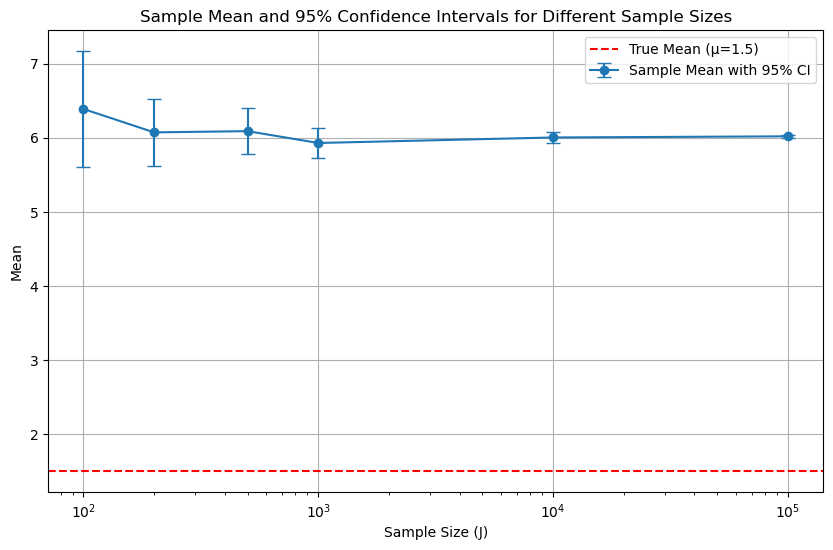

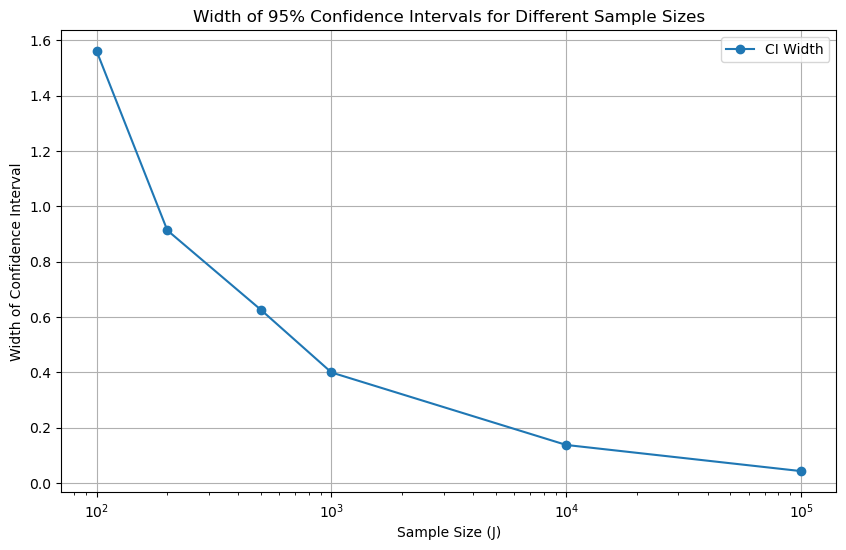

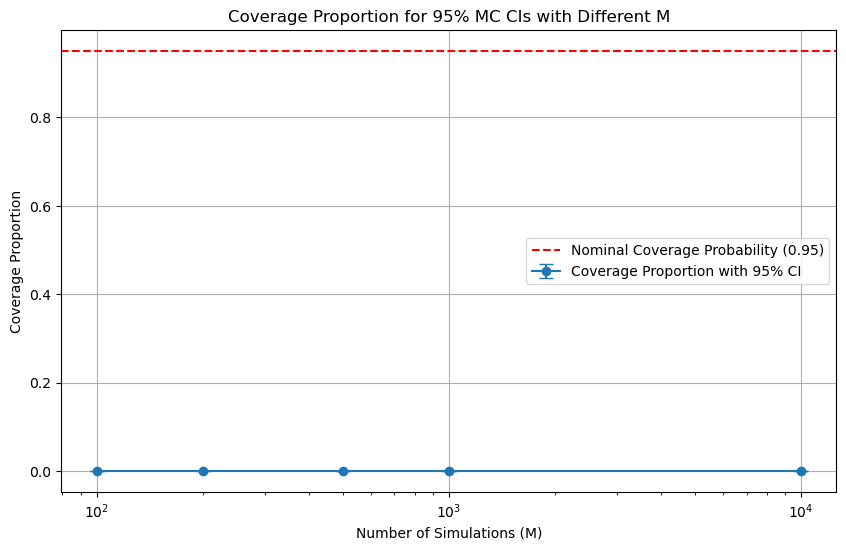

In [5]:
import random
import math
import matplotlib.pyplot as plt

# Function to calculate the 95% confidence interval for the mean
def calculate_ci(sample, alpha=0.05):
    J = len(sample)
    sample_mean = sum(sample) / J
    sample_var = sum((x - sample_mean) ** 2 for x in sample) / (J - 1)
    sample_std = math.sqrt(sample_var)
    
    z = 1.96  # z_alpha/2 for a 95% confidence interval
    margin_of_error = z * sample_std / math.sqrt(J)
    
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    return sample_mean, lower_bound, upper_bound, upper_bound - lower_bound

# Function to generate samples from the Gamma distribution
def gamma_sample(shape, scale, J):
    sample = []
    for _ in range(J):
        total = sum(-scale * math.log(random.random()) for _ in range(shape))
        sample.append(total)
    return sample

# Part (b): Repeat for larger sample sizes and plot the results
sample_sizes = [100, 200, 500, 1000, 10000, 100000]
means = []
ci_widths = []
lower_bounds = []
upper_bounds = []

for J in sample_sizes:
    sample = gamma_sample(3, 2, J)
    sample_mean, lower_bound, upper_bound, ci_width = calculate_ci(sample)
    
    means.append(sample_mean)
    ci_widths.append(ci_width)
    lower_bounds.append(lower_bound)
    upper_bounds.append(upper_bound)

# Plotting the sample means and confidence intervals
plt.figure(figsize=(10, 6))
plt.errorbar(sample_sizes, means, yerr=[(m - l) for m, l in zip(means, lower_bounds)], fmt='o-', capsize=5, label="Sample Mean with 95% CI")
plt.axhline(y=1.5, color='r', linestyle='--', label="True Mean (µ=1.5)")
plt.xscale('log')
plt.xlabel('Sample Size (J)')
plt.ylabel('Mean')
plt.title('Sample Mean and 95% Confidence Intervals for Different Sample Sizes')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the confidence interval widths as sample size increases
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, ci_widths, 'o-', label='CI Width')
plt.xscale('log')
plt.xlabel('Sample Size (J)')
plt.ylabel('Width of Confidence Interval')
plt.title('Width of 95% Confidence Intervals for Different Sample Sizes')
plt.grid(True)
plt.legend()
plt.show()

# Part (d): Plot proportion of CIs containing the true mean for different M values
M_values = [100, 200, 500, 1000, 10000]
coverage_proportions = []
ci_for_p_lower = []
ci_for_p_upper = []

for M in M_values:
    contained_count = 0
    for _ in range(M):
        sample = gamma_sample(3, 2, J=100)
        _, lower_bound, upper_bound, _ = calculate_ci(sample)
        if 1.5 >= lower_bound and 1.5 <= upper_bound:
            contained_count += 1

    p_hat = contained_count / M
    coverage_proportions.append(p_hat)
    ci_for_p_lower.append(p_hat - 1.96 * math.sqrt((p_hat * (1 - p_hat)) / M))
    ci_for_p_upper.append(p_hat + 1.96 * math.sqrt((p_hat * (1 - p_hat)) / M))

# Plotting the coverage probabilities with 95% CIs
plt.figure(figsize=(10, 6))
plt.errorbar(M_values, coverage_proportions, yerr=[(p - l) for p, l in zip(coverage_proportions, ci_for_p_lower)], fmt='o-', capsize=5, label="Coverage Proportion with 95% CI")
plt.axhline(y=0.95, color='r', linestyle='--', label="Nominal Coverage Probability (0.95)")
plt.xscale('log')
plt.xlabel('Number of Simulations (M)')
plt.ylabel('Coverage Proportion')
plt.title('Coverage Proportion for 95% MC CIs with Different M')
plt.legend()
plt.grid(True)
plt.show()


## Exercise.8: Example of Sampling from a Simple Discrete Distribution

In this exercise, we will demonstrate how to generate a value $ x $ from a Binomial distribution with parameters $ n = 2 $ and $ p = \frac{1}{2} $, i.e., a $ \text{Bin}(2, \frac{1}{2}) $ distribution, using the method described in the previous section.

The Binomial distribution with these parameters has the following probability mass function (pmf):

$$
P(X = x) = \binom{2}{x} \left(\frac{1}{2}\right)^2 = \frac{2!}{x!(2-x)!} \left(\frac{1}{2}\right)^2
$$

Thus, the probabilities for $ x = 0, 1, 2 $ are as follows:

$$
P(X = 0) = \frac{1}{4}, \quad P(X = 1) = \frac{1}{2}, \quad P(X = 2) = \frac{1}{4}
$$

We can generate a value $ x $ from this distribution by using the method of sampling from a discrete distribution. The cumulative distribution function (CDF) values for the three possible outcomes are:

$$
F_1 = P(X \leq 0) = \frac{1}{4}, \quad F_2 = P(X \leq 1) = \frac{3}{4}, \quad F_3 = P(X \leq 2) = 1
$$

### Step-by-step Procedure

1. Generate a random number $ u $ from the uniform distribution $ U(0, 1) $.
2. Compare $ u $ to the cumulative probabilities $ F_1 $, $ F_2 $, and $ F_3 $.
3. Return:
   - $ x = 0 $ if $ 0 \leq u \leq F_1 $
   - $ x = 1 $ if $ F_1 < u \leq F_2 $
   - $ x = 2 $ if $ F_2 < u \leq 1 $

### Conclusion

The above method will successfully generate values $ x = 0 $, $ x = 1 $, and $ x = 2 $ from the $ \text{Bin}(2, \frac{1}{2}) $ distribution with the specified probabilities.


## Sampling from a Discrete Probability Distribution

Suppose we wish to sample a value $ x \sim f(x) $ where $ f(x) $ is a discrete probability density function (pdf) defined over the possible values $ x = x_1, x_2, \ldots, x_K $.

1. **Define the probabilities:**
   - Let $ f_k = f(x_k) $ for $ k = 1, 2, \ldots, K $.
   - Define the cumulative distribution function (CDF) as:
     $$
     F_k = \sum_{i=1}^{k} f_i \quad (k = 1, 2, \ldots, K)
     $$
   - Note that $ F_K = 1 $.

2. **Sampling Procedure:**
   - Sample $ u \sim U(0, 1) $.
   - Return:
     $$
     x = 
     \begin{cases} 
     x_1 & \text{if } 0 \leq u \leq F_1 \\
     x_2 & \text{if } F_1 < u \leq F_2 \\
     \vdots & \vdots \\
     x_K & \text{if } F_{K-1} < u \leq F_K \, (= 1)
     \end{cases}
     $$

3. **Implementation Method:**
   - Set $ k = 1 $ and repeatedly increment $ k $ by 1 until $ F_{k-1} < u \leq F_k $.
   - Return $ x = x_k $ using the final value of $ k $ obtained.

### Notes:
- **Infinite Case:** This procedure also works if $ K $ is infinite. In this case, redefine $ K $ as a value $ k $ for which $ F_k $ is very close to 1 (e.g., $ 0.9999 $) and approximate $ f(x) $ by zero for all $ x > x_K $.
- **Alternative in R:** Instead of using $ u \sim U(0,1) $, you can apply the function `sample()` with appropriate specifications of $ x_1, \ldots, x_K $ and $ f_1, \ldots, f_K $.


In [ ]:
# Define the discrete pdf for the Binomial(2, 1/2) distribution
def binomial_pdf(k, n=2, p=0.5):
    """Calculate the probability of k successes in n trials."""
    from math import comb  # To calculate combinations
    return comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

# Define the cumulative distribution function (CDF)
def cumulative_distribution(k, n=2, p=0.5):
    """Calculate the cumulative probability for k successes."""
    return sum(binomial_pdf(i, n, p) for i in range(k + 1))

# Define the sampling function
def sample_discrete_distribution(n=2, p=0.5):
    """Sample from a discrete distribution defined by a binomial PDF."""
    # Create the list of possible values and their corresponding probabilities
    x_values = [0, 1, 2]  # Possible outcomes for Bin(2, 1/2)
    probabilities = [binomial_pdf(x, n, p) for x in x_values]
    
    # Compute cumulative probabilities
    cumulative_probs = [cumulative_distribution(x, n, p) for x in x_values]

    # Sample from uniform distribution
    u = random.uniform(0, 1)  # Generate u ~ U(0,1)

    # Determine the value of x based on the sampled u
    for k in range(len(cumulative_probs)):
        if (k == 0 and u <= cumulative_probs[k]) or (k > 0 and cumulative_probs[k-1] < u <= cumulative_probs[k]):
            return x_values[k]

# Run the sampling process multiple times to demonstrate
def run_sampling_experiment(trials=1000):
    samples = [sample_discrete_distribution() for _ in range(trials)]
    return samples

# Run the experiment and display the results
if __name__ == "__main__":
    import random
    import matplotlib.pyplot as plt
    
    # Perform the sampling experiment
    trials = 1000
    samples = run_sampling_experiment(trials)
    
    # Plot the results
    plt.hist(samples, bins=range(4), alpha=0.7, edgecolor='black', align='left')
    plt.xticks([0, 1, 2])
    plt.xlabel('Sample Value')
    plt.ylabel('Frequency')
    plt.title('Sampling from Binomial(2, 1/2) Distribution')
    plt.grid(axis='y')
    plt.show()


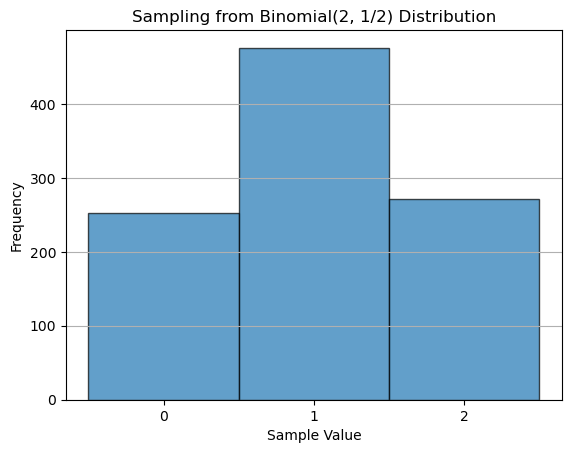

In [7]:
# Function to calculate factorial
def factorial(n):
    """Calculate the factorial of n (n!)."""
    if n == 0 or n == 1:
        return 1
    result = 1
    for i in range(2, n + 1):
        result *= i
    return result

# Function to calculate combinations (n choose k)
def combinations(n, k):
    """Calculate the number of combinations of n choose k."""
    return factorial(n) // (factorial(k) * factorial(n - k))

# Define the discrete pdf for the Binomial(2, 1/2) distribution
def binomial_pdf(k, n=2, p=0.5):
    """Calculate the probability of k successes in n trials."""
    return combinations(n, k) * (p ** k) * ((1 - p) ** (n - k))

# Define the cumulative distribution function (CDF)
def cumulative_distribution(k, n=2, p=0.5):
    """Calculate the cumulative probability for k successes."""
    return sum(binomial_pdf(i, n, p) for i in range(k + 1))

# Define the sampling function
def sample_discrete_distribution(n=2, p=0.5):
    """Sample from a discrete distribution defined by a binomial PDF."""
    # Create the list of possible values and their corresponding probabilities
    x_values = [0, 1, 2]  # Possible outcomes for Bin(2, 1/2)
    probabilities = [binomial_pdf(x, n, p) for x in x_values]
    
    # Compute cumulative probabilities
    cumulative_probs = [cumulative_distribution(x, n, p) for x in x_values]

    # Sample from uniform distribution
    u = random.uniform(0, 1)  # Generate u ~ U(0,1)

    # Determine the value of x based on the sampled u
    for k in range(len(cumulative_probs)):
        if (k == 0 and u <= cumulative_probs[k]) or (k > 0 and cumulative_probs[k-1] < u <= cumulative_probs[k]):
            return x_values[k]

# Run the sampling process multiple times to demonstrate
def run_sampling_experiment(trials=1000):
    samples = [sample_discrete_distribution() for _ in range(trials)]
    return samples

# Run the experiment and display the results
if __name__ == "__main__":
    import random
    import matplotlib.pyplot as plt
    
    # Perform the sampling experiment
    trials = 1000
    samples = run_sampling_experiment(trials)
    
    # Plot the results
    plt.hist(samples, bins=range(4), alpha=0.7, edgecolor='black', align='left')
    plt.xticks([0, 1, 2])
    plt.xlabel('Sample Value')
    plt.ylabel('Frequency')
    plt.title('Sampling from Binomial(2, 1/2) Distribution')
    plt.grid(axis='y')
    plt.show()


## Exercise.8 

Example of sampling from a simple discrete distribution Show that the above method works when applied to generating a value x from the Bin(2,1/2) distribution, i.e. that it returns x = 0, 1 and 2 with probabilities 1/4, 1/2 and 1/4, respectively.

## Solution to Exercise.8

In this case,  K = 3 and we have the following values:


$$
x_1 = 0, \quad F(x_1) = P(X \leq 0) = 0.25
$$

$$
x_2 = 1, \quad F(x_2) = P(X \leq 1) = 0.75
$$

$$
x_3 = 2, \quad F(x_3) = P(X \leq 2) = 1.00
$$

$$
\text{Let } u \sim U(0,1). \text{ Then the method returns:}
$$

$$
x = x_1 = 0 \text{ if } 0 < u < F(x_1) \text{ i.e. if } 0.00 < u < 0.25
$$

$$
x = x_2 = 1 \text{ if } F(x_1) < u < F(x_2) \text{ i.e. if } 0.25 < u < 0.75
$$

$$
x = x_3 = 2 \text{ if } F(x_2) < u < F(x_3) \text{ i.e. if } 0.75 < u < 1.00
$$

$$
\text{Thus, the probabilities for } x \text{ are:}
$$

$$
\text{Probability of being set to } 0: \quad F(x_1) - 0.00 = 0.25 - 0.00 = 0.25
$$

$$
\text{Probability of being set to } 1: \quad F(x_2) - F(x_1) = 0.75 - 0.25 = 0.50
$$

$$
\text{Probability of being set to } 2: \quad F(x_3) - F(x_2) = 1.00 - 0.75 = 0.25
$$

$$
\text{All calculations are correct.}
$$


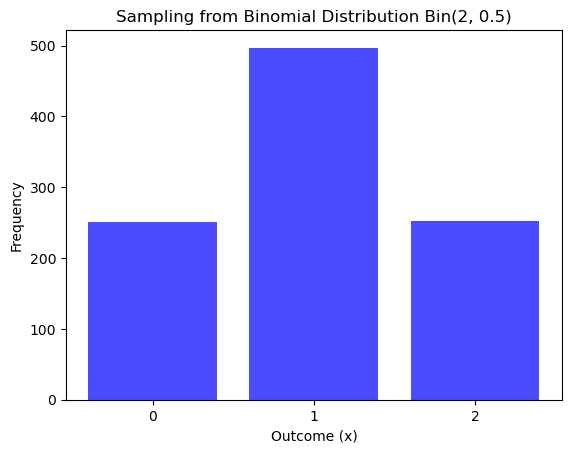

In [8]:
import random
import matplotlib.pyplot as plt

def binomial_pdf(k, n=2, p=0.5):
    """Calculate the probability of k successes in n trials."""
    # Calculate combinations: C(n, k) = n! / (k! * (n-k)!)
    def factorial(x):
        if x == 0 or x == 1:
            return 1
        result = 1
        for i in range(2, x + 1):
            result *= i
        return result

    combinations = factorial(n) / (factorial(k) * factorial(n - k))
    return combinations * (p ** k) * ((1 - p) ** (n - k))

def sample_discrete_distribution(n=2, p=0.5):
    """Sample from the discrete distribution defined by Bin(n, p)."""
    # Create the list of possible values and their corresponding probabilities
    x_values = [0, 1, 2]  # Possible outcomes for Bin(2, 1/2)
    probabilities = [binomial_pdf(x, n, p) for x in x_values]

    # Compute cumulative probabilities
    cumulative_probabilities = [sum(probabilities[:i + 1]) for i in range(len(probabilities))]

    # Generate a uniform random number
    u = random.uniform(0, 1)

    # Return the corresponding value based on the uniform sample
    for k in range(len(cumulative_probabilities)):
        if u <= cumulative_probabilities[k]:
            return x_values[k]

def run_sampling_experiment(trials=1000):
    """Run the sampling process multiple times to demonstrate."""
    samples = [sample_discrete_distribution() for _ in range(trials)]
    return samples

# Perform the sampling experiment
trials = 1000
samples = run_sampling_experiment(trials)

# Calculate frequency of each outcome
outcomes = [0, 1, 2]
frequencies = [samples.count(outcome) for outcome in outcomes]

# Plot the results
plt.bar(outcomes, frequencies, color='blue', alpha=0.7)
plt.xlabel('Outcome (x)')
plt.ylabel('Frequency')
plt.title('Sampling from Binomial Distribution Bin(2, 0.5)')
plt.xticks(outcomes)
plt.show()


## Exercise.9: Sampling from a Complicated Discrete Distribution

Consider the discrete distribution defined by the probability density function (pdf):

$$
f(x) \propto \frac{x^3 e^{-x}}{1+x}, \quad x = 1, 3, 5, \ldots
$$

### Mean of the Distribution

To find the mean of the distribution, we first compute the kernel:

$$
k(x) = \frac{x^3 e^{-x}}{1+x}, \quad x = 1, 3, 5, \ldots, 41
$$

Noting that the last two values of $ k(x) $ are tiny:

- $ k(39) \approx 9.455201 \times 10^{-14} $
- $ k(41) \approx 1.454999 \times 10^{-14} $

We calculate the sum of the kernel values:

$$
c = k(1) + k(3) + \ldots + k(41) = 1.051009
$$

By normalizing the kernel, we obtain:

$$
f(x) = \frac{k(x)}{c}, \quad x = x_1, \ldots, x_K
$$

where $ x_k = 2k - 1 $ for $ k = 1, \ldots, K $ and $K = 21 $.

The exact mean of the distribution is evaluated numerically as:

$$
\mu = \sum_{k=1}^{K} x_k f(x_k) = 3.6527
$$

**Note**: Changing the upper limit from 41 to 101 does not significantly change the approximation of the mean; it remains approximately 3.6527, indicating that 41 is a good upper bound.

### Sampling from the Distribution

To sample $ J = 100,000 $ values from the distribution, we can use the following command in Python:

`


Exact Mean: 3.2006
Monte Carlo Estimate of Mean: 3.2009


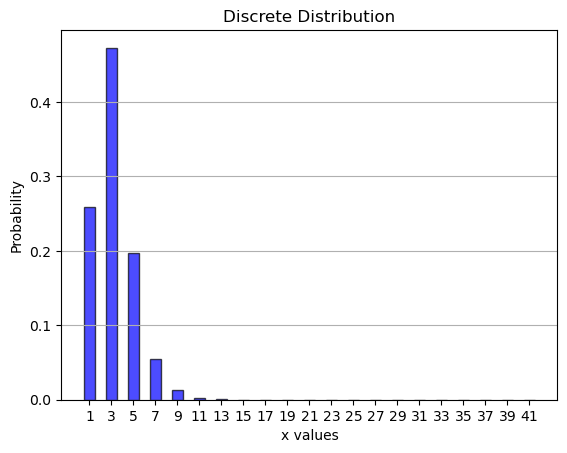

In [9]:
import matplotlib.pyplot as plt
import random

# Define the kernel function k(x)
def kernel(x):
    return (x**3 * (2.718281828459045 ** -x)) / (1 + x)

# Generate x values (1, 3, 5, ..., 41)
x_values = list(range(1, 42, 2))

# Calculate kernel values for the given x_values
k_values = [kernel(x) for x in x_values]

# Normalize to get the probabilities f(x)
c = sum(k_values)  # Normalization constant
f_values = [k / c for k in k_values]

# Calculate the exact mean of the distribution
mean_exact = sum(x * f for x, f in zip(x_values, f_values))

# Generate a random sample of size J = 100000 from the distribution
J = 100000
samples = random.choices(x_values, weights=f_values, k=J)

# Calculate the Monte Carlo estimate of the mean
mean_monte_carlo = sum(samples) / len(samples)

# Display the results
print(f"Exact Mean: {mean_exact:.4f}")
print(f"Monte Carlo Estimate of Mean: {mean_monte_carlo:.4f}")

# Plotting the distribution
plt.bar(x_values, f_values, width=1.0, alpha=0.7, color='blue', edgecolor='black')
plt.title("Discrete Distribution")
plt.xlabel("x values")
plt.ylabel("Probability")
plt.xticks(x_values)
plt.grid(axis='y')
plt.show()
